<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/preparing_dataset_with_image_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Number Plate Recognition Project

- Image annotated using [Roboflow](https://roboflow.com/)
- Dataset used for the project downloaded from [Kaggle](https://kaggle.com/)
- Link to the dataset [Click here to download](https://www.kaggle.com/datasets/tkm22092/indian-number-plate-images)

### Steps to complete

***Image and .txt file:*** Downloaded the annotation text file using roboflow our first task to draw the annotation on image using that text file

***Cropping the annotated image:*** Then our second part is need to crop the image based on the annotation


### Task 1: Drawing BBOX using the .txt file

In [24]:
#importing necessary modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

***Sub task 1: Drawing bbox on single image***

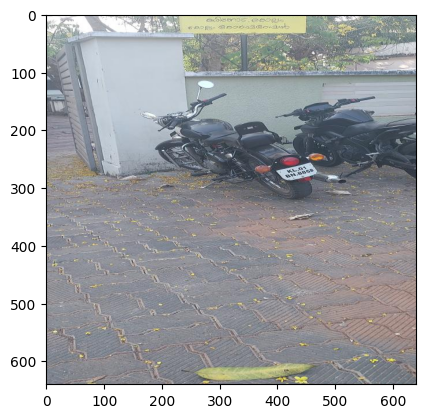

In [25]:
#open image using cv2
img_1 = cv2.imread("/content/drive/MyDrive/ComputerVisionTutorial/workout_file/images/20230327_170242_jpg.rf.4f06ef2542ddff8a9504c050b4f181ff.jpg")
plt.imshow(img_1[:, :, ::-1])

***Bounding Box Value From roboflow (YOLO)***

In [26]:
with open("/content/drive/MyDrive/ComputerVisionTutorial/workout_file/labels/20230327_170242_jpg.rf.4f06ef2542ddff8a9504c050b4f181ff.txt", "r") as f:
  data = f.read()
  print(data)

0 0.68359375 0.42890625 0.13125 0.03671875


In [27]:
#converting to list
data = data.split(" ")
print(data)

['0', '0.68359375', '0.42890625', '0.13125', '0.03671875']


- `0`: The class label (usually an integer).
- `0.68359375`: The x-coordinate of the center of the bounding box (normalized).
- `0.42890625`: The y-coordinate of the center of the bounding box (normalized).
- `0.13125`: The width of the bounding box (normalized).
- `0.03671875`: The height of the bounding box (normalized).

***Sub task 1:***
Converting the normalized values back to pixel cordinates

For that, first need the image dimensions (`image_width` and `image_height`), then needs to calculate to find `bbox`'s x-axis, y-axis, bbox_width and height. So above we have the four values `class-label` not need to take so the list will look like this `[label, x, y, width, height]` again we're going to calculate the following `bb0x_x`, `bbox_y`, `bbox_width` and `bbox_height`.

 1. **Convert normalized values to actual pixel values:**
   - `bbox_x = x * image_width`
   - `bbox_y = y * image_height`
   - `bbox_width = width * image_width`
   - `bbox_height = height * image_height`

In [28]:
#finding images width and height
img_height, img_width, _ = img_1.shape
print(img_height, img_width)

640 640


In [29]:
label, x, y, width, height = data
print(x, y, width, height)

0.68359375 0.42890625 0.13125 0.03671875


In [30]:
#converting to actual pixel values
bbox_x = float(x)*img_width
bbox_y = float(y)*img_height
bbox_width = float(width)*img_width
bbox_height = float(height)*img_height

In [31]:
print(bbox_x, bbox_y,  bbox_width, bbox_height)

437.5 274.5 84.0 23.5


Now we got the actual pixel values, next we have to find the corners for the bbox, for that:

2. **Calculate the top-left and bottom-right corners of the bounding box:**
   - `top_left_x = bbox_x - (bbox_width / 2)`
   - `top_left_y = bbox_y - (bbox_height / 2)`
   - `bottom_right_x = bbox_x + (bbox_width / 2)`
   - `bottom_right_y = bbox_y + (bbox_height / 2)`

In [32]:
#finding the corners
top_left_x = bbox_x - (bbox_width / 2)
top_left_y = bbox_y - (bbox_height / 2)
bottom_right_x = bbox_x + (bbox_width / 2)
bottom_right_y = bbox_y + (bbox_height / 2)

In [33]:
print(top_left_x, top_left_y, bottom_right_x, bottom_right_y)

395.5 262.75 479.5 286.25


***Drawing bbox using the above cordinates***

> Before that you have to change the `float` values to the `int`

In [34]:
#converting float to integer
top_left_x = int(top_left_x)
top_left_y = int(top_left_y)
bottom_right_x = int(bottom_right_x)
bottom_right_y = int(bottom_right_y)

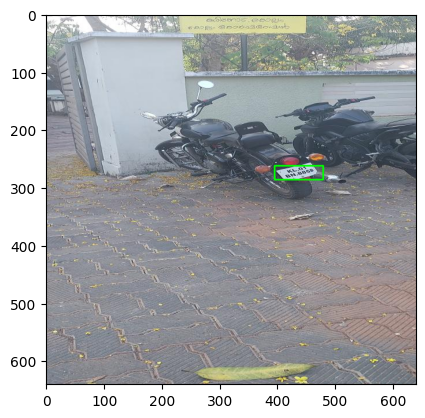

In [36]:
#drawing bbox
img_copy_int = img_1.copy()
cv2.rectangle(img_copy_int, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
plt.imshow(img_copy_int[:, :, ::-1])

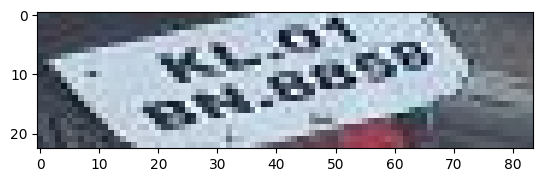

In [43]:
img_crop = img_1.copy()
img_crop = img_crop[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
plt.imshow(img_crop[:, :, ::-1])

***Sub task 2: Drawing Multiple bbox in a single image***

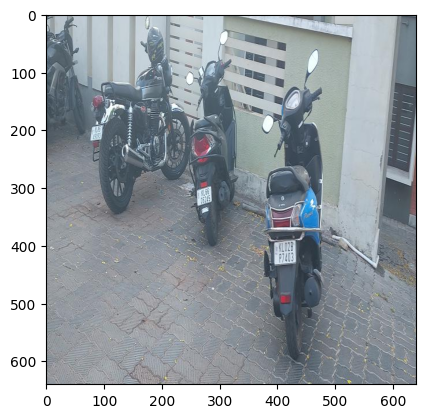

In [51]:
#selecting the image file
img_2 = cv2.imread("/content/drive/MyDrive/ComputerVisionTutorial/workout_file/images/20230327_170249_jpg.rf.2710f1178eafff6ece61522150398320.jpg")
plt.imshow(img_2[:, :, ::-1])

In [52]:
with open("/content/drive/MyDrive/ComputerVisionTutorial/workout_file/labels/20230327_170249_jpg.rf.2710f1178eafff6ece61522150398320.txt", "r") as f:
  data = f.read()
  print(data)

0 0.1375 0.321875 0.0453125 0.06328125
0 0.43046875 0.49453125 0.06328125 0.05546875
0 0.646875 0.6484375 0.07890625 0.09296875


In [53]:
data = data.split("\n")
print(data)

['0 0.1375 0.321875 0.0453125 0.06328125', '0 0.43046875 0.49453125 0.06328125 0.05546875', '0 0.646875 0.6484375 0.07890625 0.09296875']


In [54]:
data = [i.split(" ") for i in data]
print(data)

[['0', '0.1375', '0.321875', '0.0453125', '0.06328125'], ['0', '0.43046875', '0.49453125', '0.06328125', '0.05546875'], ['0', '0.646875', '0.6484375', '0.07890625', '0.09296875']]


In [55]:
#converting normal cordinates to actual pixel values
img_height, img_width, _ = img_2.shape
print(height, width)

0.09296875 0.07890625


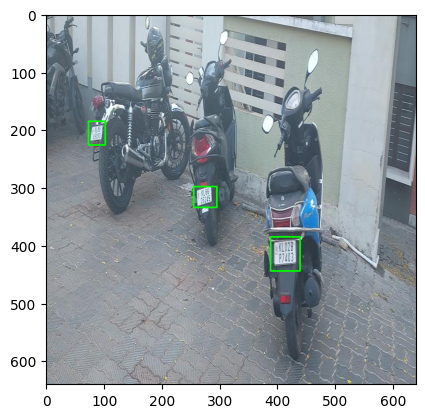

In [56]:
for key, i in enumerate(data):
  label, x, y, width, height = i
  #converting to pixel
  bbox_x = float(x)*img_width
  bbox_y = float(y)*img_height
  bbox_width = float(width)*img_width
  bbox_height = float(height)*img_height
  #getting corners
  top_left_x = int(bbox_x - (bbox_width / 2))
  top_left_y = int(bbox_y - (bbox_height / 2))
  bottom_right_x = int(bbox_x + (bbox_width / 2))
  bottom_right_y = int(bbox_y + (bbox_height / 2))
  #drawing lines
  img_crop = img_2.copy()
  img_crop = img_crop[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
  cv2.imwrite(f"img_{key}.png", img_crop)
  cv2.rectangle(img_2, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
plt.imshow(img_2[:, :, ::-1])

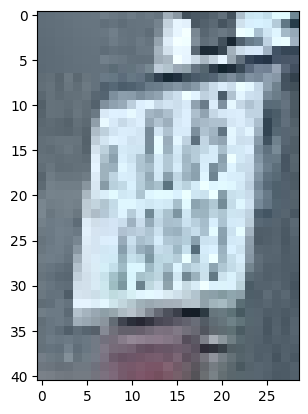

In [57]:
cropped_img  = cv2.imread("img_0.png")
plt.imshow(cropped_img[:, :, ::-1])

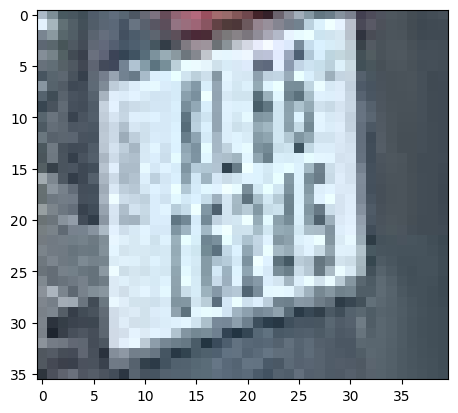

In [58]:
cropped_img2 = cv2.imread("img_1.png")
plt.imshow(cropped_img2[:, :, ::-1])

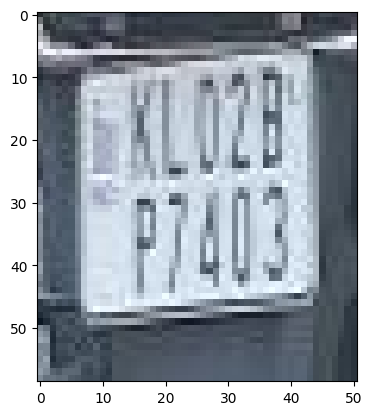

In [59]:
cropped_img3 = cv2.imread("img_2.png")
plt.imshow(cropped_img3[:, :, ::-1])